In [66]:
import numpy as np

def golden_ratio_search(f, a, b, tol=10e-3, max_iter=1000):
    """ Busqueda del mínimo de una función mediante el
        método de la razón áurea. El algoritmo termina después
        de max_iter iteraciones, o cuando la longitud del intervalo
        de búsqueda es inferior a tol.
        @param f: Función para optimizar
        @param a: Cota inferior del intervalo de búsqueda
        @param b: Cota superior del intervalo de búsqueda
        @param tol: Precisión deseada
        @param max_iter: Cantidad de iteraciones
        @return i, a, b
    """
    # Definimos las condiciones iniciales y parámetros
    r = (-1 + np.sqrt(5)) / 2
    c =  a + (b - a) * (1 - r)
    d =  a + (b - a) * r
    yc = f(c)
    yd = f(d)
    # Notifico cada iteración
    print(f'a{0}={a} c{0}={c} d{0}={d} b{0}={b} yc{0}={yc} yd{0}={yd}\n')
    
    # Empezamos a iterar hasta el máximo numero de iteraciones
    for i in range(max_iter):
        
        if yd >= yc:
            b = d
            d = c
            yd = yc
            c = a + (b - a) * (1 - r)
            yc = f(c)
        else:
            a = c
            c = d
            yc = yd
            d = a + (b - a) * r
            yd = f(d)
            
        # Notifico cada iteración
        print(f'a{i+1}={a} c{i+1}={c} d{i+1}={d} b{i+1}={b} yc{i+1}={yc} yd{i+1}={yd}\n')
        
        # En el caso en el que hayamos conseguido pasar la precisión deseada
        if (b - a) < tol:
            break
    
    # Devuelve resultados
    return i+1, a, b

In [67]:
# Ejercicio 2
f = lambda x: np.cos(x**2 - 2*x + 1)
a = 0
b = 4
i, a, b = golden_ratio_search(f, a, b, tol=1e-6)

# Resultado
print(f'El minimo del Ejercicio 2 luego de {i} iteraciones se encuentra entre a={a} b={b}')

a0=0 c0=1.5278640450004204 d0=2.4721359549995796 b0=4 yc0=0.9614302693200105 yd0=-0.5616576373354573

a1=1.5278640450004204 c1=2.4721359549995796 d1=3.0557280900008412 b1=4 yc1=-0.5616576373354573 yd1=-0.46742081059554813

a2=1.5278640450004204 c2=2.1114561800016824 d2=2.4721359549995796 b2=3.0557280900008412 yc2=0.3292049676759298 yd2=-0.5616576373354573

a3=2.1114561800016824 c3=2.4721359549995796 d3=2.6950483150029445 b3=3.0557280900008412 yc3=-0.5616576373354573 yd3=-0.9641954083186008

a4=2.4721359549995796 c4=2.6950483150029445 d4=2.8328157299974763 b4=3.0557280900008412 yc4=-0.9641954083186008 yd4=-0.9764138886348016

a5=2.6950483150029445 c5=2.8328157299974763 d5=2.9179606750063094 b5=3.0557280900008412 yc5=-0.9764138886348016 yd5=-0.859257203997432

a6=2.6950483150029445 c6=2.780193260011777 d6=2.8328157299974763 b6=2.9179606750063094 yc6=-0.9996220255940037 yd6=-0.9764138886348016

a7=2.6950483150029445 c7=2.7476707849886437 d7=2.780193260011777 b7=2.8328157299974763 yc7=-0.9

In [33]:
# Ejercicio 3
a = -1
b = 1
f = lambda x: np.cosh(x)
i, a, b = golden_ratio_search(f, a, b, max_iter=3, tol=1e-6)

# Resultado
print(f'El minimo del Ejercicio 2 luego de {i} iteraciones se encuentra entre a={a} b={b}')

a1=-1 c1=-0.2360679774997898 d1=0.2360679774997898 b1=1 yc1=1.0279936864491186 yd1=1.0279936864491186

a2=-1 c2=-0.5278640450004206 d2=-0.2360679774997898 b2=0.2360679774997898 yc2=1.14258544274237 yd2=1.0279936864491186

a3=-0.5278640450004206 c3=-0.2360679774997898 d3=-0.05572809000084111 b3=0.2360679774997898 yc3=1.0279936864491186 yd3=1.001553211918995

El minimo del Ejercicio 2 luego de 3 iteraciones se encuentra entre a=-0.2360679774997898 b=0.2360679774997898


In [57]:
import numpy as np

def quadratic_aproximation(f, xo, ho):
    """ Búsqueda del mínimo de una función mediante búsqueda lineal utilizando
        una interpolación cuadrática, donde se itera hasta encontrar una sonrisa,
        y luego aproximamos el salto.
        @param f: La función cuyo minimo buscamos
        @param xo: El punto inicial del intervalo
        @param ho: El tamaña del salto
    """
    # Definimos los parámetros y condiciones iniciales
    po = (xo, f(xo))
    p1 = (po[0] + ho, f(po[0] + ho))
    p2 = (p1[0] + ho, f(p1[0] + ho))
    
    # Iteramos en la búsqueda del mínimo, en realidad,
    # buscamos formar una sonrisa!
    found = False
    while not found:
        print(f'Iterando ({po[0]}, {po[1]}) - ({p1[0]}, {p1[1]}) - ({p2[0]}, {p2[1]})')
        if po[1] < p1[1] < p2[1]:
            ho = ho / 2
            p2 = p1
            p1 = (po[0] + ho, f(po[0] + ho))
        elif p2[1] < p1[1] < po[1]:
            ho = ho * 2
            p1 = p2
            p2 = (p1[0] + ho, f(p1[0] + ho))
        else:
            found = True
    
    # Cuando lo encontramos, establecemos una aproximación
    hmin = ho * (4 * p1[1] - 3 * po[1] - p2[1]) / (4 * p1[1] - 2 * po[1] - 2 * p2[1])
    return po[0] + hmin, hmin

In [59]:
# Ejercicio 4
f = lambda x: np.sin(x)
xo = 3
ho = 0.5

x, hmin = quadratic_aproximation(f, xo, ho)

print(f'El minimo se encuentra aproximadamente en {x} con paso {hmin}')

Iterando (3, 0.1411200080598672) - (3.5, -0.35078322768961984) - (4.0, -0.7568024953079282)
Iterando (3, 0.1411200080598672) - (4.0, -0.7568024953079282) - (5.0, -0.9589242746631385)
Iterando (3, 0.1411200080598672) - (5.0, -0.9589242746631385) - (7.0, 0.6569865987187891)
El minimo se encuentra aproximadamente en 4.810060711238418 con paso 1.8100607112384182


In [72]:
import numpy as np

def steepest_descent(f, grad, xo, n):
    """ Búsqueda del mínimo de la función de campo escalar f,
        dado su gradiente y un punto inicial para partir. Además,
        se define una cantidad máxima de iteraciones.
        @param f: Función a optimizar
        @param grad: Gradiente de la función a optimizar
        @param xo: Punto inicial
        @param n: Cantidad de pasos máximos
    """
    
    # Condiciones iniciales y parámetros
    x = xo
    
    for i in range(n):
        # Calculo la dirección de descenso
        d = -grad(x)
        
        # Busqueda lineal por aproximación cuadrática de la longitud del paso
        g = lambda alfa: f(x + alfa * d)
        alfa_min, h_min = quadratic_aproximation(g, 0, 1)
        
        # Calculo la siguiente posición
        x = x + alfa_min * d
        
        print(f'Iteración {i+1}: x({i+1}) = {x}')
    
    # Retorna posición final
    return x

In [81]:
# Ejercicio 5
f = lambda x: np.log(1 + x[0]**2 + x[1]**2)
grad = lambda x: 2 * np.array([x[0], x[1]]) / f(x)
xo = np.array([1, 1])

x = steepest_descent(f, grad, xo, 1)

print(f"Resultado del ejercicio 5 x={x}")

Iterando (0, 1.0986122886681098) - (1, 0.8528693612145746) - (2, 2.7046649284644184)
Iteración 1: x(1) = [-0.12352242 -0.12352242]
Resultado del ejercicio 5 x=[-0.12352242 -0.12352242]


In [82]:
# Ejercicio 6
f = lambda x: np.exp(x[0]**2 + x[1]**2)
grad = lambda x: np.array([2 * x[0], 2 * x[1]]) * f(x)
xo = np.array([-1, 1])

x = steepest_descent(f, grad, xo, 1)

print(f"Resultado del ejercicio 6 x={x}")

Iterando (0, 7.38905609893065) - (1, 7.75855590906839e+164) - (2, inf)
Iterando (0, 7.38905609893065) - (0.5, 2.856500904344902e+35) - (1, 7.75855590906839e+164)
Iterando (0, 7.38905609893065) - (0.25, 2024762.1983447538) - (0.5, 2.856500904344902e+35)
Iterando (0, 7.38905609893065) - (0.125, 4.202638974399466) - (0.25, 2024762.1983447538)
Iteración 1: x(1) = [-0.07636508  0.07636508]
Resultado del ejercicio 6 x=[-0.07636508  0.07636508]


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [120]:
import numpy as np
from matplotlib import pyplot as plt

def nelder_mead(f, x, n):
    """ Búsqueda del mínimo de una función de campo escalar
        mediante el método simplex o nelder-mead.
        @param f: Función de campo escalar
        @param x: Vector de n+1 puntos del simplex
        @param n: Cantidad de iteraciones
    """
    x = np.asarray(sorted(x, key=lambda xi: f(xi)))
    history = [x]
    for i in range(n):
        # Ordenamos 
        x = np.asarray(sorted(x, key=lambda xi: f(xi)))
        
        # Definimos los puntos O, B, P dentro del vector n+1 dimensional
        O = x[0]
        B = x[-2]
        P = x[-1]
        
        print(f'Iteración {i+1} O={O} P={P} B={B}')

        # Primer paso, realizamos la REFLEXIÓN, calculando
        # la posición del baricentro M, y buscando la reflexión R
        M = (O + B) / 2
        R = 2 * M - P
        
        print(f'Reflexión: M={M} R={R}')
        
        if f(R) < f(B):
            if f(O) < f(R):
                # Es peor que el óptimo pero mejor que el peor
                print('La reflexión no era mejor que el óptimo')
                x[-1] = R
            else:
                print('La reflexión era mejor el óptimo')
                # Es mejor que el óptimo, EXPANSIÓN
                E = 3 * M - 2 * P
                print(f'Expansión: E={E}')
                if f(E) < f(O):
                    # Es mejor que el óptimo
                    print('La expansión era mejor el óptimo')
                    x[-1] = E
                else:
                    # Es peor que el óptimo
                    print('La expansión no era mejor el óptimo')
                    x[-1] = R
        else:
            if f(R) < f(P):
                # No es mejor que el bueno, pero sí es mejor
                # que el peor
                print('La reflexión, al menos, es mejor que el peor')
                x[-1] = R
            else:
                # Como la reflexión y expansión no sirven,
                # se prueba con la CONTRACCIÓN
                C1 = (R + M) / 2
                C2 = (P + M) / 2
                C =  C1 if f(C1) < f(C2) else C2
                print(f'Contracción: C1={C1} C2={C2} C={C}')
                
                if f(C) < f(P):
                    # Si la contracción es mejor que el peor
                    print('La contracción era mejor que el peor')
                    x[-1] = C
                else:
                    # Si la contracción no es mejor que el peor
                    # procedo al ENCOGIMIENTO
                    print('La contracción no era mejor, procedemos a encoger')
                    for j in range(1, len(x)):
                        x[j] = (x[j] + O) / 2
                
        # Guardamos historia
        print(x)
        history.append(x)
        
    # Retorno el simplex resultante
    return x, history

def plot_nelder_mead(history):
    """ Función para dibujar los puntos del simplex a lo largo
        del algoritmo. Esta función no es de mi propiedad intelectual,
        fue alterada del código de Gonzalo Davidov y Nicolás Trozzo,
        si estas leyendo esto que al pedo estas.
        @param history: Lista de simplex en cada iteración
    """
    colors = ['r', 'g', 'b', 'c', 'm', 'y']
    for k in range(len(history)):
        x = history[k]
        plt.scatter(x[:,0], x[:,1], c=colors[k % len(colors)], label=f'Iteracion {k}')
        t = plt.Polygon(x, color=colors[k % len(colors)], fill=False)
        plt.gca().add_patch(t)
    plt.legend()
    plt.show()

Iteración 1 O=[3. 0.] P=[0. 3.] B=[3. 3.]
Reflexión: M=[3.  1.5] R=[6. 0.]
Contracción: C1=[4.5  0.75] C2=[1.5  2.25] C=[1.5  2.25]
La contracción era mejor que el peor
[[3.   0.  ]
 [3.   3.  ]
 [1.5  2.25]]
Iteración 2 O=[1.5  2.25] P=[3. 3.] B=[3. 0.]
Reflexión: M=[2.25  1.125] R=[ 1.5  -0.75]
La reflexión, al menos, es mejor que el peor
[[ 1.5   2.25]
 [ 3.    0.  ]
 [ 1.5  -0.75]]
Iteración 3 O=[1.5  2.25] P=[ 1.5  -0.75] B=[3. 0.]
Reflexión: M=[2.25  1.125] R=[3. 3.]
Contracción: C1=[2.625  2.0625] C2=[1.875  0.1875] C=[1.875  0.1875]
La contracción era mejor que el peor
[[1.5    2.25  ]
 [3.     0.    ]
 [1.875  0.1875]]
Iteración 4 O=[1.875  0.1875] P=[3. 0.] B=[1.5  2.25]
Reflexión: M=[1.6875  1.21875] R=[0.375  2.4375]
Contracción: C1=[1.03125  1.828125] C2=[2.34375  0.609375] C=[2.34375  0.609375]
La contracción era mejor que el peor
[[1.875    0.1875  ]
 [1.5      2.25    ]
 [2.34375  0.609375]]


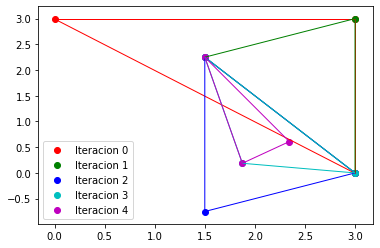

In [123]:
# Ejercicio 7
f = lambda x: (x[0] - 2)**2 + (x[1] - 1)**2
xo = np.array([
    np.array([0, 3]),
    np.array([3, 0]),
    np.array([3, 3])
], dtype=float)

x, history = nelder_mead(f, xo, 4)
plot_nelder_mead(history)

Iteración 1 O=[0. 1.] P=[ 1. -2.] B=[-1. -1.]
Reflexión: M=[-0.5  0. ] R=[-2.  2.]
Contracción: C1=[-1.25  1.  ] C2=[ 0.25 -1.  ] C=[ 0.25 -1.  ]
La contracción era mejor que el peor
[[ 0.    1.  ]
 [-1.   -1.  ]
 [ 0.25 -1.  ]]
Iteración 2 O=[0. 1.] P=[-1. -1.] B=[ 0.25 -1.  ]
Reflexión: M=[0.125 0.   ] R=[1.25 1.  ]
Contracción: C1=[0.6875 0.5   ] C2=[-0.4375 -0.5   ] C=[-0.4375 -0.5   ]
La contracción era mejor que el peor
[[ 0.      1.    ]
 [ 0.25   -1.    ]
 [-0.4375 -0.5   ]]


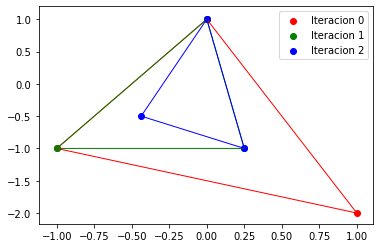

In [125]:
# Ejercicio 8
f = lambda x: np.exp(x[0]**2 + x[1]**2)
xo = np.array([
    np.array([-1, -1]),
    np.array([0, 1]),
    np.array([1, -2])
], dtype=float)

x, history = nelder_mead(f, xo, 2)
plot_nelder_mead(history)

Iteración 1 O=[-1. -2.] P=[ 2. -2.] B=[0. 2.]
Reflexión: M=[-0.5  0. ] R=[-3.  2.]
Contracción: C1=[-1.75  1.  ] C2=[ 0.75 -1.  ] C=[ 0.75 -1.  ]
La contracción era mejor que el peor
[[-1.   -2.  ]
 [ 0.    2.  ]
 [ 0.75 -1.  ]]
Iteración 2 O=[-1. -2.] P=[0. 2.] B=[ 0.75 -1.  ]
Reflexión: M=[-0.125 -1.5  ] R=[-0.25 -5.  ]
La reflexión era mejor el óptimo
Expansión: E=[-0.375 -8.5  ]
La expansión era mejor el óptimo
[[-1.    -2.   ]
 [ 0.75  -1.   ]
 [-0.375 -8.5  ]]
Iteración 3 O=[-0.375 -8.5  ] P=[ 0.75 -1.  ] B=[-1. -2.]
Reflexión: M=[-0.6875 -5.25  ] R=[-2.125 -9.5  ]
Contracción: C1=[-1.40625 -7.375  ] C2=[ 0.03125 -3.125  ] C=[ 0.03125 -3.125  ]
La contracción era mejor que el peor
[[-0.375   -8.5    ]
 [-1.      -2.     ]
 [ 0.03125 -3.125  ]]


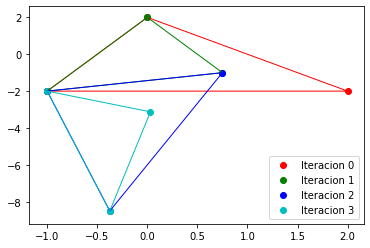

In [129]:
# Ejercicio 9
f = lambda x: (x[0]**2) * (x[1]**2) + 3 * x[0] + 3 * x[1] + 5
xo = np.array([
    np.array([-1, -2]),
    np.array([2, -2]),
    np.array([0, 2])
], dtype=float)

x, history = nelder_mead(f, xo, 3)
plot_nelder_mead(history)